In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv", header=None)

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(x.shape)
print(y.shape)

(1934, 63)
(1934,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1547, 63)
(387, 63)
(1547,)
(387,)


### SVC Model

In [12]:
from sklearn.svm import SVC

svm = SVC(probability=True)

svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9689922480620154

In [10]:
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt

y_pred = svm.predict(x_test)


cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

report = classification_report(y_test, y_pred)

print(report)

print("Micro: ",precision_score(y_test, y_pred, average="micro"))
print("Macro: ",precision_score(y_test, y_pred, average="macro"))

print("Micro: ",recall_score(y_test, y_pred, average="micro"))
print("Macro: ",recall_score(y_test, y_pred, average="macro"))

print("Micro: ",f1_score(y_test, y_pred, average="micro"))
print("Macro: ",f1_score(y_test, y_pred, average="macro"))



              precision    recall  f1-score   support

       close       0.91      0.89      0.90        47
        down       1.00      1.00      1.00        33
        full       1.00      0.93      0.96        41
        left       0.82      0.90      0.86        40
        like       1.00      1.00      1.00        25
       loser       1.00      1.00      1.00        38
       right       1.00      1.00      1.00        42
        stop       1.00      1.00      1.00        44
          up       1.00      1.00      1.00        35
         up2       1.00      1.00      1.00        42

    accuracy                           0.97       387
   macro avg       0.97      0.97      0.97       387
weighted avg       0.97      0.97      0.97       387



ValueError: could not convert string to float: 'loser'

### Random Forest

0.9844961240310077


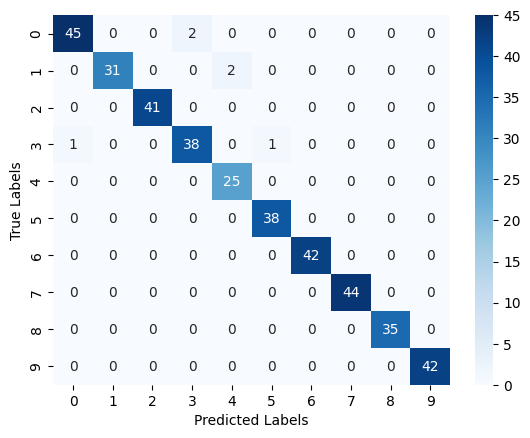

              precision    recall  f1-score   support

       close       0.98      0.96      0.97        47
        down       1.00      0.94      0.97        33
        full       1.00      1.00      1.00        41
        left       0.95      0.95      0.95        40
        like       0.93      1.00      0.96        25
       loser       0.97      1.00      0.99        38
       right       1.00      1.00      1.00        42
        stop       1.00      1.00      1.00        44
          up       1.00      1.00      1.00        35
         up2       1.00      1.00      1.00        42

    accuracy                           0.98       387
   macro avg       0.98      0.98      0.98       387
weighted avg       0.98      0.98      0.98       387

Micro:  0.9844961240310077
Macro:  0.9828545769850117
Micro:  0.9844961240310077
Macro:  0.9846840747904577
Micro:  0.9844961240310077
Macro:  0.983504338403532


{'down': 0.9696969696969697,
 'right': 1.0,
 'stop': 1.0,
 'up2': 1.0,
 'like': 0.9972375690607735,
 'up': 1.0,
 'left': 0.9721181556195965,
 'loser': 0.998567335243553,
 'close': 0.9772528160200251,
 'full': 1.0}

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

report = classification_report(y_test, y_pred)

print(report)

print("Micro: ",precision_score(y_test, y_pred, average="micro"))
print("Macro: ",precision_score(y_test, y_pred, average="macro"))

print("Micro: ",recall_score(y_test, y_pred, average="micro"))
print("Macro: ",recall_score(y_test, y_pred, average="macro"))

print("Micro: ",f1_score(y_test, y_pred, average="micro"))
print("Macro: ",f1_score(y_test, y_pred, average="macro"))



In [9]:
import pickle

with open('rf.pkl','wb') as f:
    pickle.dump(rf,f)

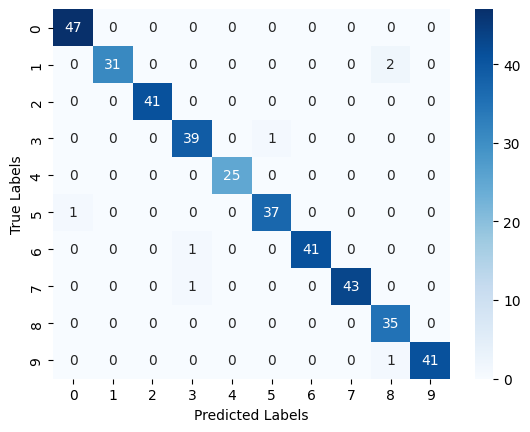

0.9819121447028424
              precision    recall  f1-score   support

       close       0.98      1.00      0.99        47
        down       1.00      0.94      0.97        33
        full       1.00      1.00      1.00        41
        left       0.95      0.97      0.96        40
        like       1.00      1.00      1.00        25
       loser       0.97      0.97      0.97        38
       right       1.00      0.98      0.99        42
        stop       1.00      0.98      0.99        44
          up       0.92      1.00      0.96        35
         up2       1.00      0.98      0.99        42

    accuracy                           0.98       387
   macro avg       0.98      0.98      0.98       387
weighted avg       0.98      0.98      0.98       387

Micro:  0.9819121447028424
Macro:  0.9825123020967051
Micro:  0.9819121447028424
Macro:  0.9817731829573935
Micro:  0.9819121447028424
Macro:  0.9818184328873114


{'down': 0.9696969696969697,
 'right': 0.9880952380952381,
 'stop': 0.9886363636363636,
 'up2': 0.9880952380952381,
 'like': 1.0,
 'up': 0.9957386363636364,
 'left': 0.9846181556195965,
 'loser': 0.985409440506711,
 'close': 0.9985294117647059,
 'full': 1.0}

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoost = GradientBoostingClassifier()
GradientBoost.fit(x_train, y_train)

y_pred = GradientBoost.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred)

print(report)

print("Micro: ",precision_score(y_test, y_pred, average="micro"))
print("Macro: ",precision_score(y_test, y_pred, average="macro"))

print("Micro: ",recall_score(y_test, y_pred, average="micro"))
print("Macro: ",recall_score(y_test, y_pred, average="macro"))

print("Micro: ",f1_score(y_test, y_pred, average="micro"))
print("Macro: ",f1_score(y_test, y_pred, average="macro"))

from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

In [ ]:
import pickle

with open('gb.pkl','wb') as f:
    pickle.dump(GradientBoost,f)

In [12]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
log.score(x_test,y_test)

c:\Users\Ganesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9767441860465116

In [4]:
# Apply some hybrid models other than previous models


TypeError: 'LogisticRegression' object is not iterable